In [300]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(GGally))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(export))

In [285]:
theme_set(theme_bw())
mycolor <- c("#0080ff", "#ffa500", "red", "darkgreen", "black")
mycolor_alpha <- c("#8AB5F9", "#F8CB89", "#F08581", "#87A57E", "#797979")
theme_legend_free = function(){
	theme(axis.title.y = element_text(size = 17, margin = margin(t=0, r=5, b=0, l=10)),
          axis.title.x = element_text(size = 17),
          axis.text.y = element_text(size = 15, face = 'bold'),
          axis.text.x = element_text(size = 15, face= 'bold'),
          axis.ticks.x = element_blank(),
          legend.position = "none",
          plot.title = element_text(size = 20, face = 'bold'),
          plot.subtitle = element_text(size = 14),
          plot.margin = unit(c(0.5,0.5,0,0.5), "cm"),
          panel.grid = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank())
}

#### Import data and functions and themes

In [392]:
data <- read.csv("table3.csv", header = T); 
data$vars <- factor(data$Treatment, levels = c("HFD", "HFD+LXN", "HFD+HXN", "HFD+TXN", "LFD")); 
data <- data %>% mutate(lv_tot_tag = LV_TAG * liver_wt,
                          rest_fat = Fat_mass - lv_tot_tag/1000 - (TG_feces*fecal_tot_output)/1000 - plasma_TAG*58.5*(wt/1000)/(100*1000))

# https://www.nc3rs.org.uk/mouse-decision-tree-blood-sampling#:~:text=On%20average%2C%20mice%20have%20around,x%200.025%20kg%20%3D%201.46%20ml.

head(data)
txn <- data %>% filter(vars == "HFD+TXN"); hfd <- data %>% filter(vars == "HFD");
lxn <- data %>% filter(vars == "HFD+LXN"); hxn <- data %>% filter(vars == "HFD+HXN");
lfd <- data %>% filter(vars == "LFD")

,ID,Treatment,Cal_cum,LV_TAG,lipidosis_area_pct,Fat_mass,subq_wt,epi_wat,mesenteric_wt,plasma_TAG,liver_wt,TG_feces,fecal_tot_output,wt,vars,lv_tot_tag,rest_fat
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,1,LFD,1425.870,367.77,17.596,11.152,0.40,1.80,0.33,38.547,1.58,23.400,0.75,38.4,LFD,581.0766,10.552507
2,2,LFD,1241.231,400.53,0.696,7.357,0.72,1.34,0.48,53.408,1.28,20.865,0.72,33.1,LFD,512.6784,6.828265
3,3,LFD,1298.180,379.47,17.311,10.517,0.89,2.08,0.94,68.087,1.38,20.280,0.66,35.7,LFD,523.6686,9.978525
4,4,LFD,1812.026,332.67,16.353,12.781,0.78,2.13,0.54,37.492,1.96,23.010,0.90,43.0,LFD,652.0332,12.107315
5,5,LFD,1373.638,408.33,5.164,6.385,0.26,0.97,0.32,46.053,1.38,19.695,0.89,32.2,LFD,563.4954,5.803109
6,6,LFD,1448.174,454.35,22.362,11.460,0.99,2.07,0.60,45.932,1.59,10.335,0.76,39.5,LFD,722.4165,10.728668


In [331]:
ggplotRegression <- function (fit, vars) {

require(ggplot2)

ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1])) + 
  geom_point(aes(color = vars), size = 3) +
  scale_color_manual(values = mycolor) +
  stat_smooth(method = "lm", col = "red", geom = "smooth") +
  labs(subtitle = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     " P =",signif(summary(fit)$coef[2,4], 4),
                     "\nIntercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5))) 
}

####################################################################################################################

ggplotRegression2 <- function (fit) {

require(ggplot2)

ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1])) + 
  geom_point(size = 3) +
  stat_smooth(method = "lm", col = "red", geom = "smooth") +
  #scale_color_manual(values = mycolor) +
  labs(subtitle = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                        " P =",signif(summary(fit)$coef[2,4], 4),
                        "\nIntercept =",signif(fit$coef[[1]],5 ),
                        " Slope =",signif(fit$coef[[2]], 5)))
}


####################################################################################################################

# Figure 2 - Liver total TAG and caloric intake

In [286]:
figA <- ggplot(data = data, aes(x = vars, y = lv_tot_tag, fill = vars)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 4, width = 0.2, height = 0.1) +
    labs(x = '', y = 'mg', subtitle = "Total liver triglycerides") +
	#xlab(" ") + ylab("mg") +
	ggtitle("A") +
	theme_bw() +
	theme_legend_free()
label.df <- data.frame(vars = c("HFD+TXN", "LFD"),
                       lv_tot_tag = c(1100, 1100))
figA <- figA + geom_text(data = label.df, label = c("**", "**"), color='red', size = 12)

In [287]:
figB <- ggplotRegression(lm(lv_tot_tag ~ Cal_cum, data = data), data$vars)+ 
    labs(x = ' ', y = 'Total liver triglyceride', title = "B. Overall") + theme_legend_free()

In [288]:
lfd_lv_tot_tag <- ggplotRegression2(lm(lv_tot_tag ~ Cal_cum, data = lfd)) + labs(x = ' ', y = 'Total liver triglyceride', title = "C. LFD") + theme_legend_free()
hfd_lv_tot_tag <- ggplotRegression2(lm(lv_tot_tag ~ Cal_cum, data = hfd))+ labs(x = ' ', y = '', title = "D. HFD") + theme_legend_free()
lxn_lv_tot_tag <- ggplotRegression2(lm(lv_tot_tag ~ Cal_cum, data = lxn))+ labs(x = ' ', y = '', title = "E. HFD+LXN") + theme_legend_free()
hxn_lv_tot_tag <- ggplotRegression2(lm(lv_tot_tag ~ Cal_cum, data = hxn))+ labs(x = 'Total caloric intake', y = 'Total liver triglyceride', title = "F. HFD+HXN") + theme_legend_free()
txn_lv_tot_tag <- ggplotRegression2(lm(lv_tot_tag ~ Cal_cum, data = txn))+ labs(x = ' ', y = '', title = "G. HFD+TXN") + theme_legend_free()

figC <- (lfd_lv_tot_tag | hfd_lv_tot_tag) / (lxn_lv_tot_tag |hxn_lv_tot_tag | txn_lv_tot_tag) + 
        plot_layout(guides="collect") +
        plot_annotation(title = 'lv_tot_tag vs. Calories', 
        theme = theme(title = element_text(size = 20, face = 2)))

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Exported graph as lvtag.svg



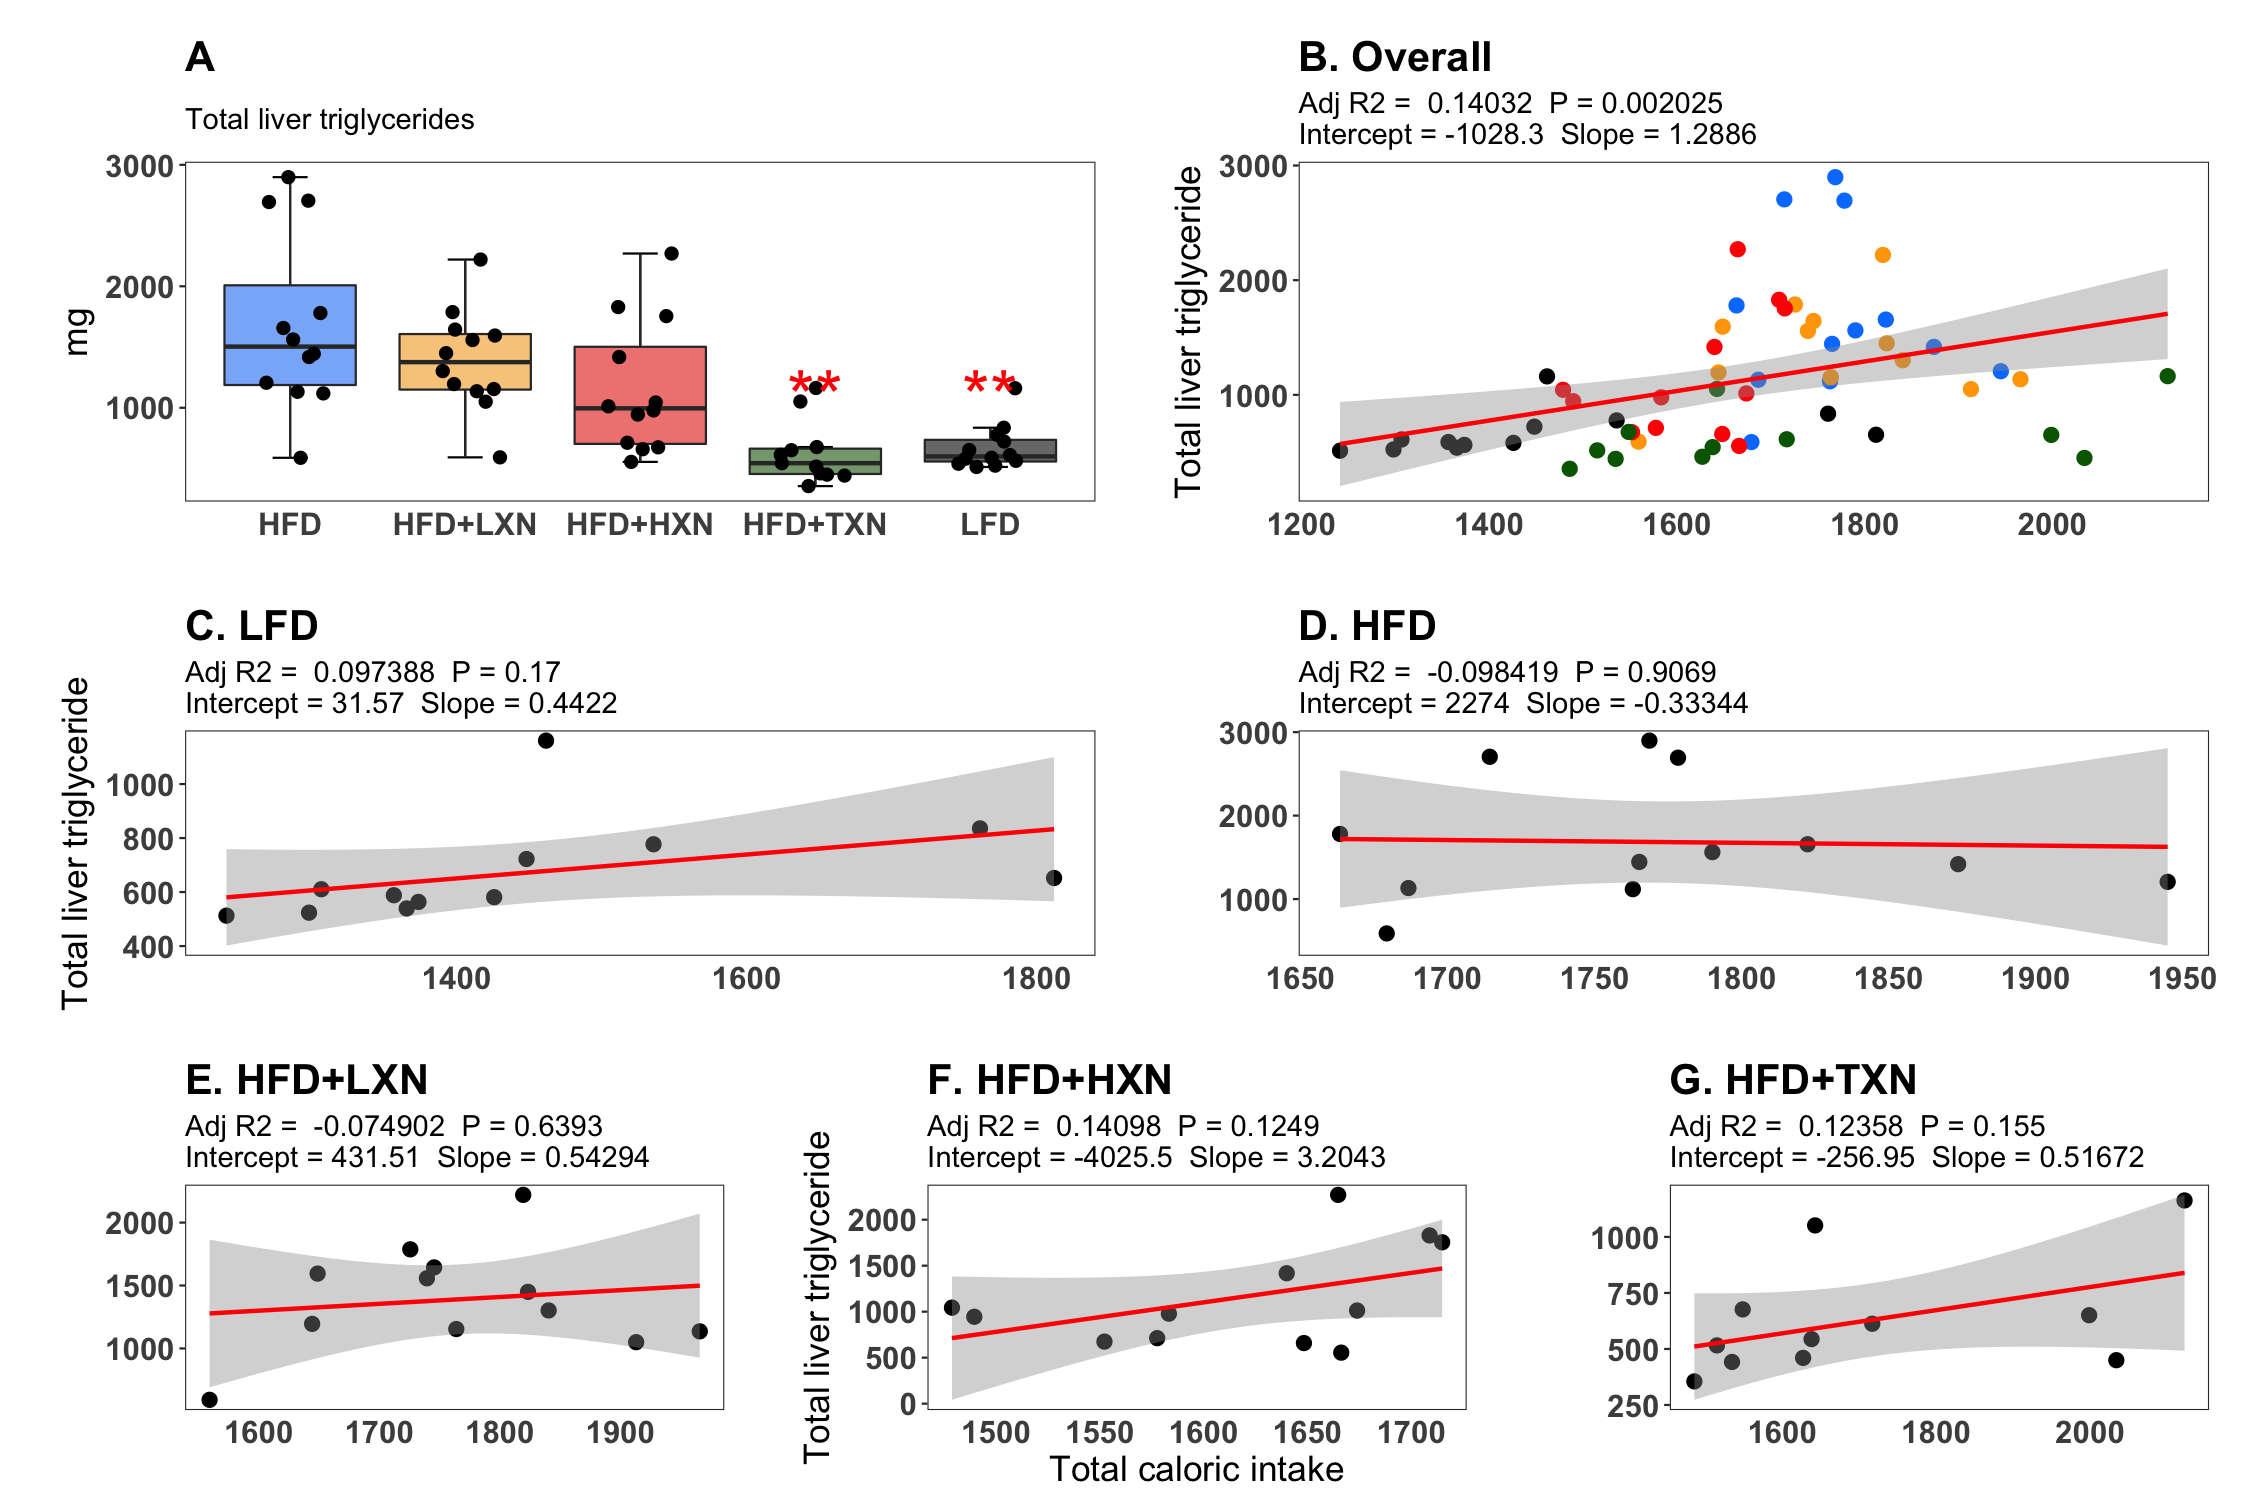

In [289]:
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 150)
(parA <- ((figA | figB) / figC) + plot_layout(heights = c(1, 2)))
#graph2svg(parA, file = "lvtag.svg", width = 14, height = 10)

#### Figure 2: Total liver TAG and caloric intake.

# Figure 3 - Liver lipidosis area percent and caloric intake

In [296]:
figD <- ggplot(data = data, aes(x = vars, y = lipidosis_area_pct, fill = vars)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 4, width = 0.2, height = 0.1) +
	labs(x = '', y = '%', subtitle = "Lipidosis area percent", title = "A") +
	theme_bw() +
	theme_legend_free()

In [293]:
figE <- ggplotRegression(lm(lipidosis_area_pct ~ Cal_cum, data = data), data$vars)+ 
    labs(x = ' ', y = 'Lipidosis area percent', title = "B. Overall") + theme_legend_free()

In [294]:
lfd_lipidosis_area_pct <- ggplotRegression2(lm(lipidosis_area_pct ~ Cal_cum, data = lfd)) + labs(x = ' ', y = 'Lipidosis area percent', title = "C. LFD") + theme_legend_free()
hfd_lipidosis_area_pct <- ggplotRegression2(lm(lipidosis_area_pct ~ Cal_cum, data = hfd))+ labs(x = ' ', y = '', title = "D. HFD") + theme_legend_free()
lxn_lipidosis_area_pct <- ggplotRegression2(lm(lipidosis_area_pct ~ Cal_cum, data = lxn))+ labs(x = ' ', y = '', title = "E. HFD+LXN") + theme_legend_free()
hxn_lipidosis_area_pct <- ggplotRegression2(lm(lipidosis_area_pct ~ Cal_cum, data = hxn))+ labs(x = 'Total caloric intake', y = 'Lipidosis area percent', title = "F. HFD+HXN") + theme_legend_free()
txn_lipidosis_area_pct <- ggplotRegression2(lm(lipidosis_area_pct ~ Cal_cum, data = txn))+ labs(x = ' ', y = '', title = "G. HFD+TXN") + theme_legend_free()

figF <- (lfd_lipidosis_area_pct | hfd_lipidosis_area_pct) / (lxn_lipidosis_area_pct |hxn_lipidosis_area_pct | txn_lipidosis_area_pct) + 
        plot_layout(guides="collect") +
        plot_annotation(title = 'Lipidosis area percent vs. Calories', 
        theme = theme(title = element_text(size = 20, face = 2)))

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Exported graph as lvlipidosis.svg



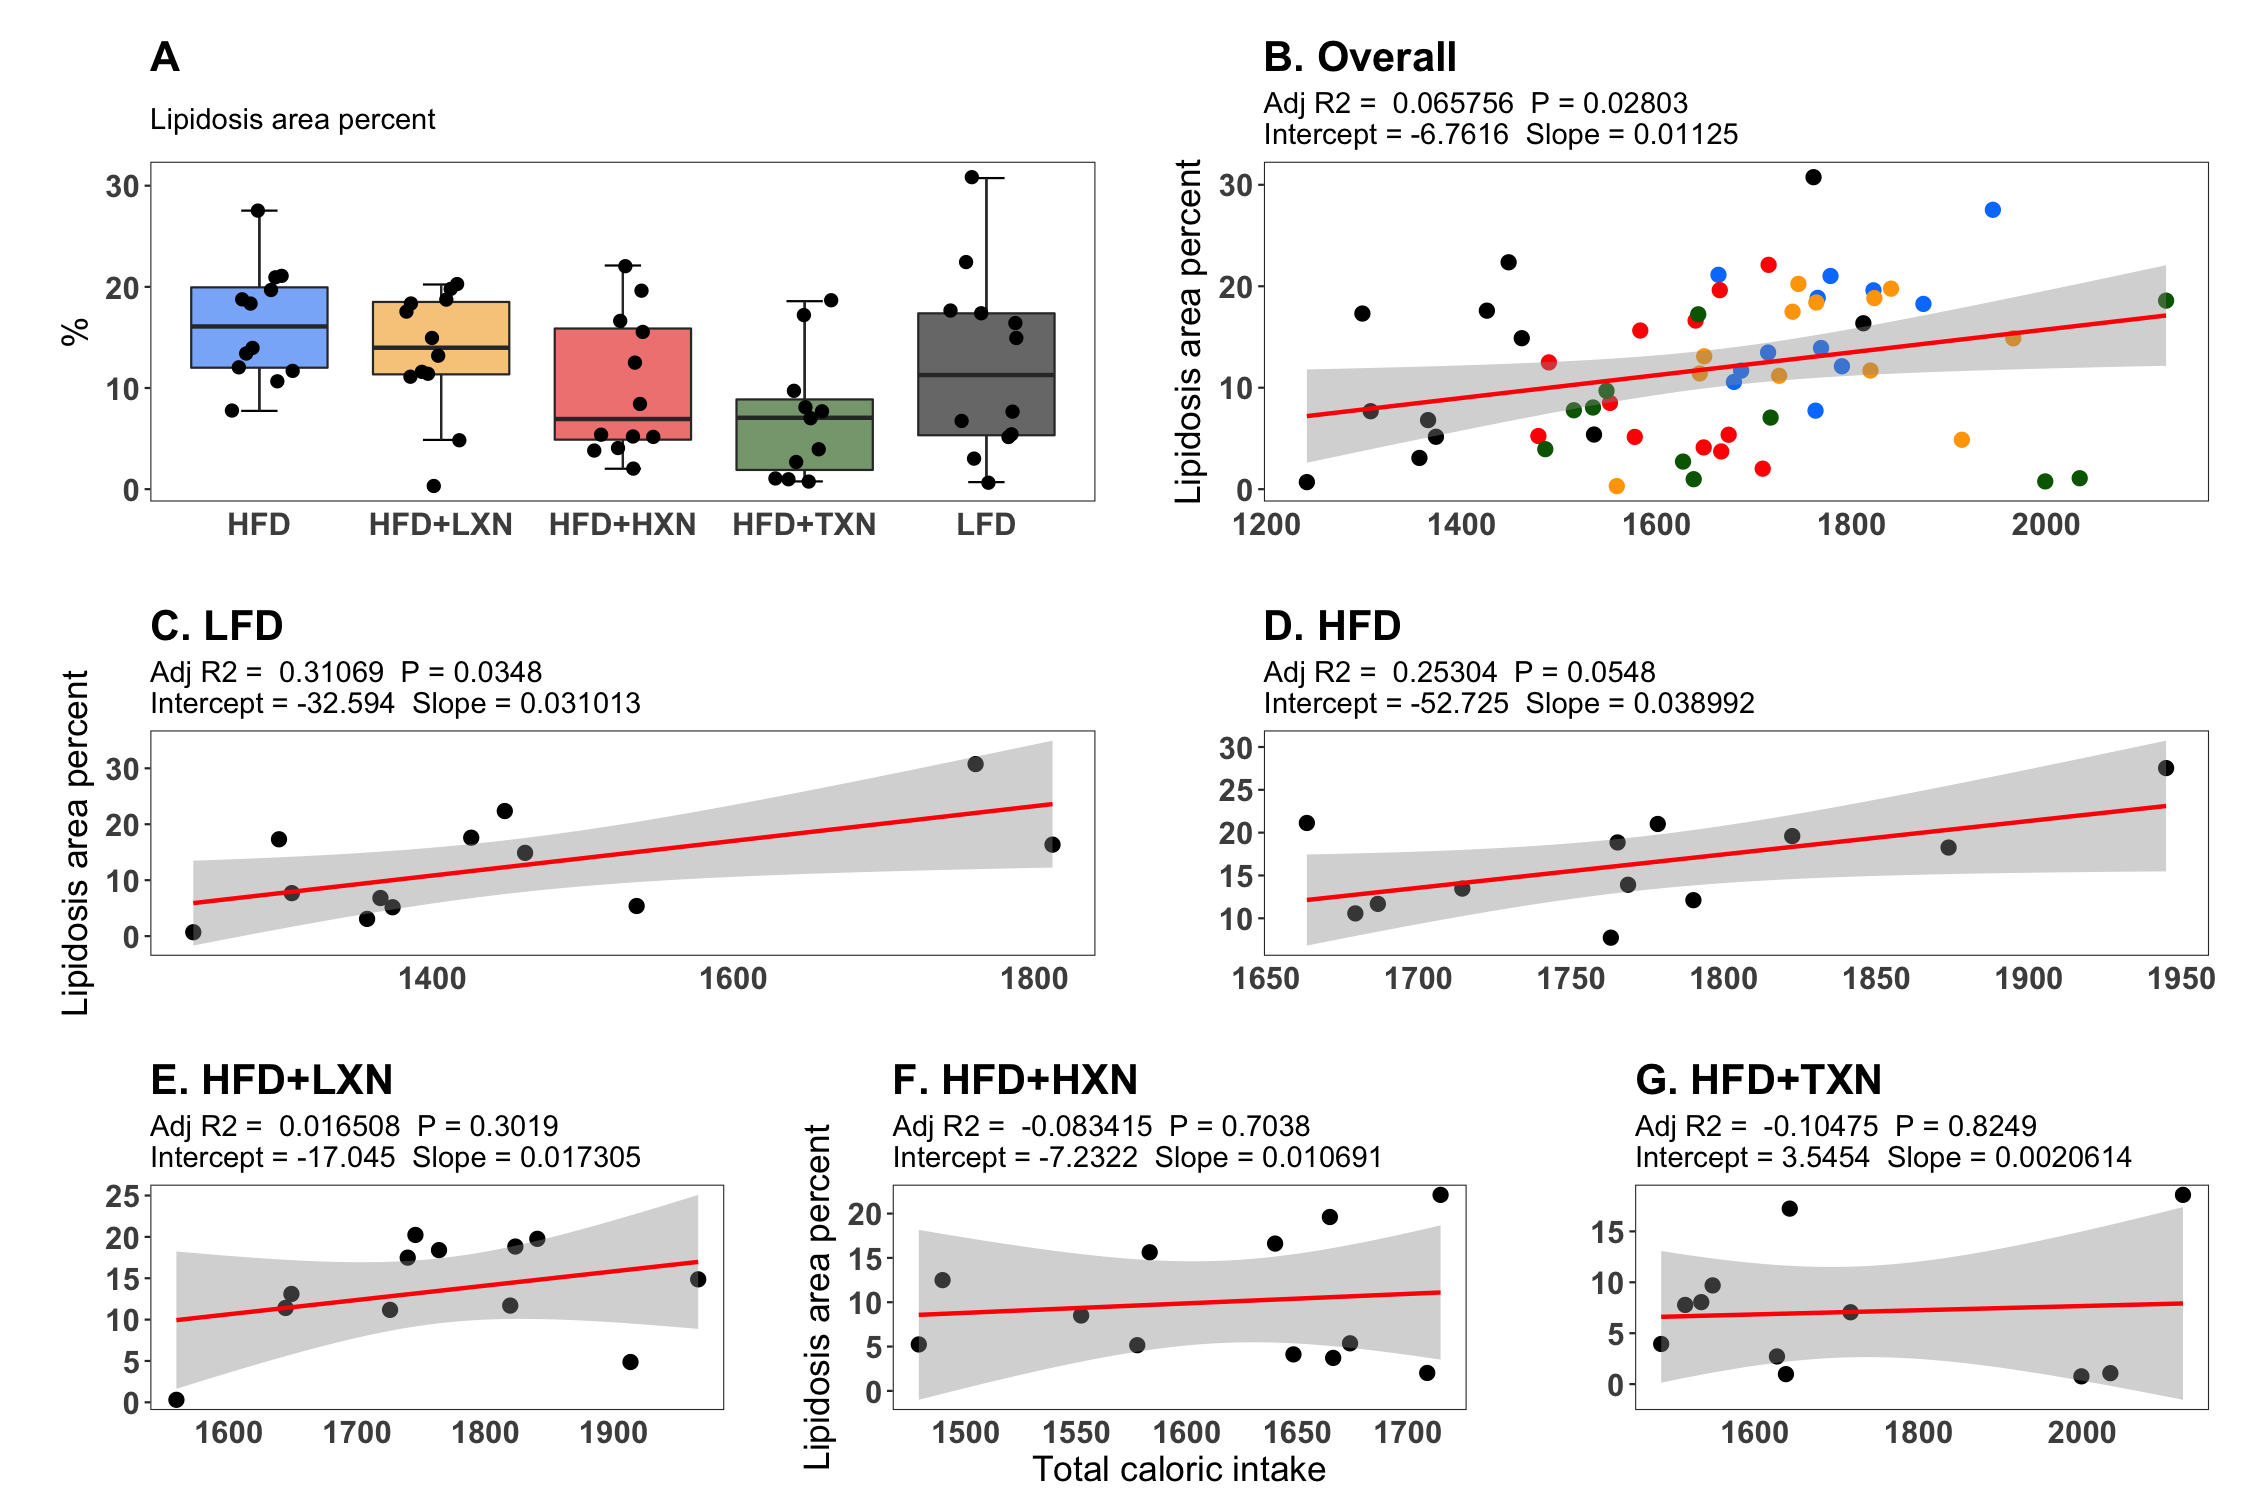

In [298]:
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 150)
(parB <- ((figD | figE) / figF) + plot_layout(heights = c(1, 2)))
graph2svg(parB, file = "lvlipidosis.svg", width = 14, height = 10)

#### Figure 3. Lipidosis area percent and caloric intake.

# Figure 4 - Adipose tissue and caloric intake

In [361]:
fig1 <- ggplot(data = data, aes(x = vars, y = Fat_mass, fill = vars)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 4, width = 0.2, height = 0.1) +
	labs(x = '', y = 'g', subtitle = "Total fat mass, dexa") +
	#xlab(" ") + ylab("mg") +
	ggtitle("A") +
	theme_bw() +
	theme_legend_free()

In [367]:
fig2 <- ggplotRegression(lm(Fat_mass ~ Cal_cum, data = data), data$vars)+ 
labs(x = ' ', y = 'Total fat mass', title = "B. Overall") + theme_legend_free()

In [368]:
lfd_Fat_mass <- ggplotRegression2(lm(Fat_mass ~ Cal_cum, data = lfd)) + labs(x = ' ', y = 'Total fat mass', title = "C. LFD") + theme_legend_free()
hfd_Fat_mass <- ggplotRegression2(lm(Fat_mass ~ Cal_cum, data = hfd))+ labs(x = ' ', y = '', title = "D. HFD") + theme_legend_free()
lxn_Fat_mass <- ggplotRegression2(lm(Fat_mass ~ Cal_cum, data = lxn))+ labs(x = ' ', y = '', title = "E. HFD+LXN") + theme_legend_free()
hxn_Fat_mass <- ggplotRegression2(lm(Fat_mass ~ Cal_cum, data = hxn))+ labs(x = 'Total caloric intake', y = 'Total fat mass', title = "F. HFD+HXN") + theme_legend_free()
txn_Fat_mass <- ggplotRegression2(lm(Fat_mass ~ Cal_cum, data = txn))+ labs(x = ' ', y = '', title = "G. HFD+TXN") + theme_legend_free()

fig3 <- (lfd_Fat_mass | hfd_Fat_mass) / (lxn_Fat_mass |hxn_Fat_mass | txn_Fat_mass) + 
        plot_layout(guides="collect") +
        plot_annotation(title = 'Fat_mass vs. Calories', 
        theme = theme(title = element_text(size = 20, face = 2)))

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Exported graph as fat_mass.svg



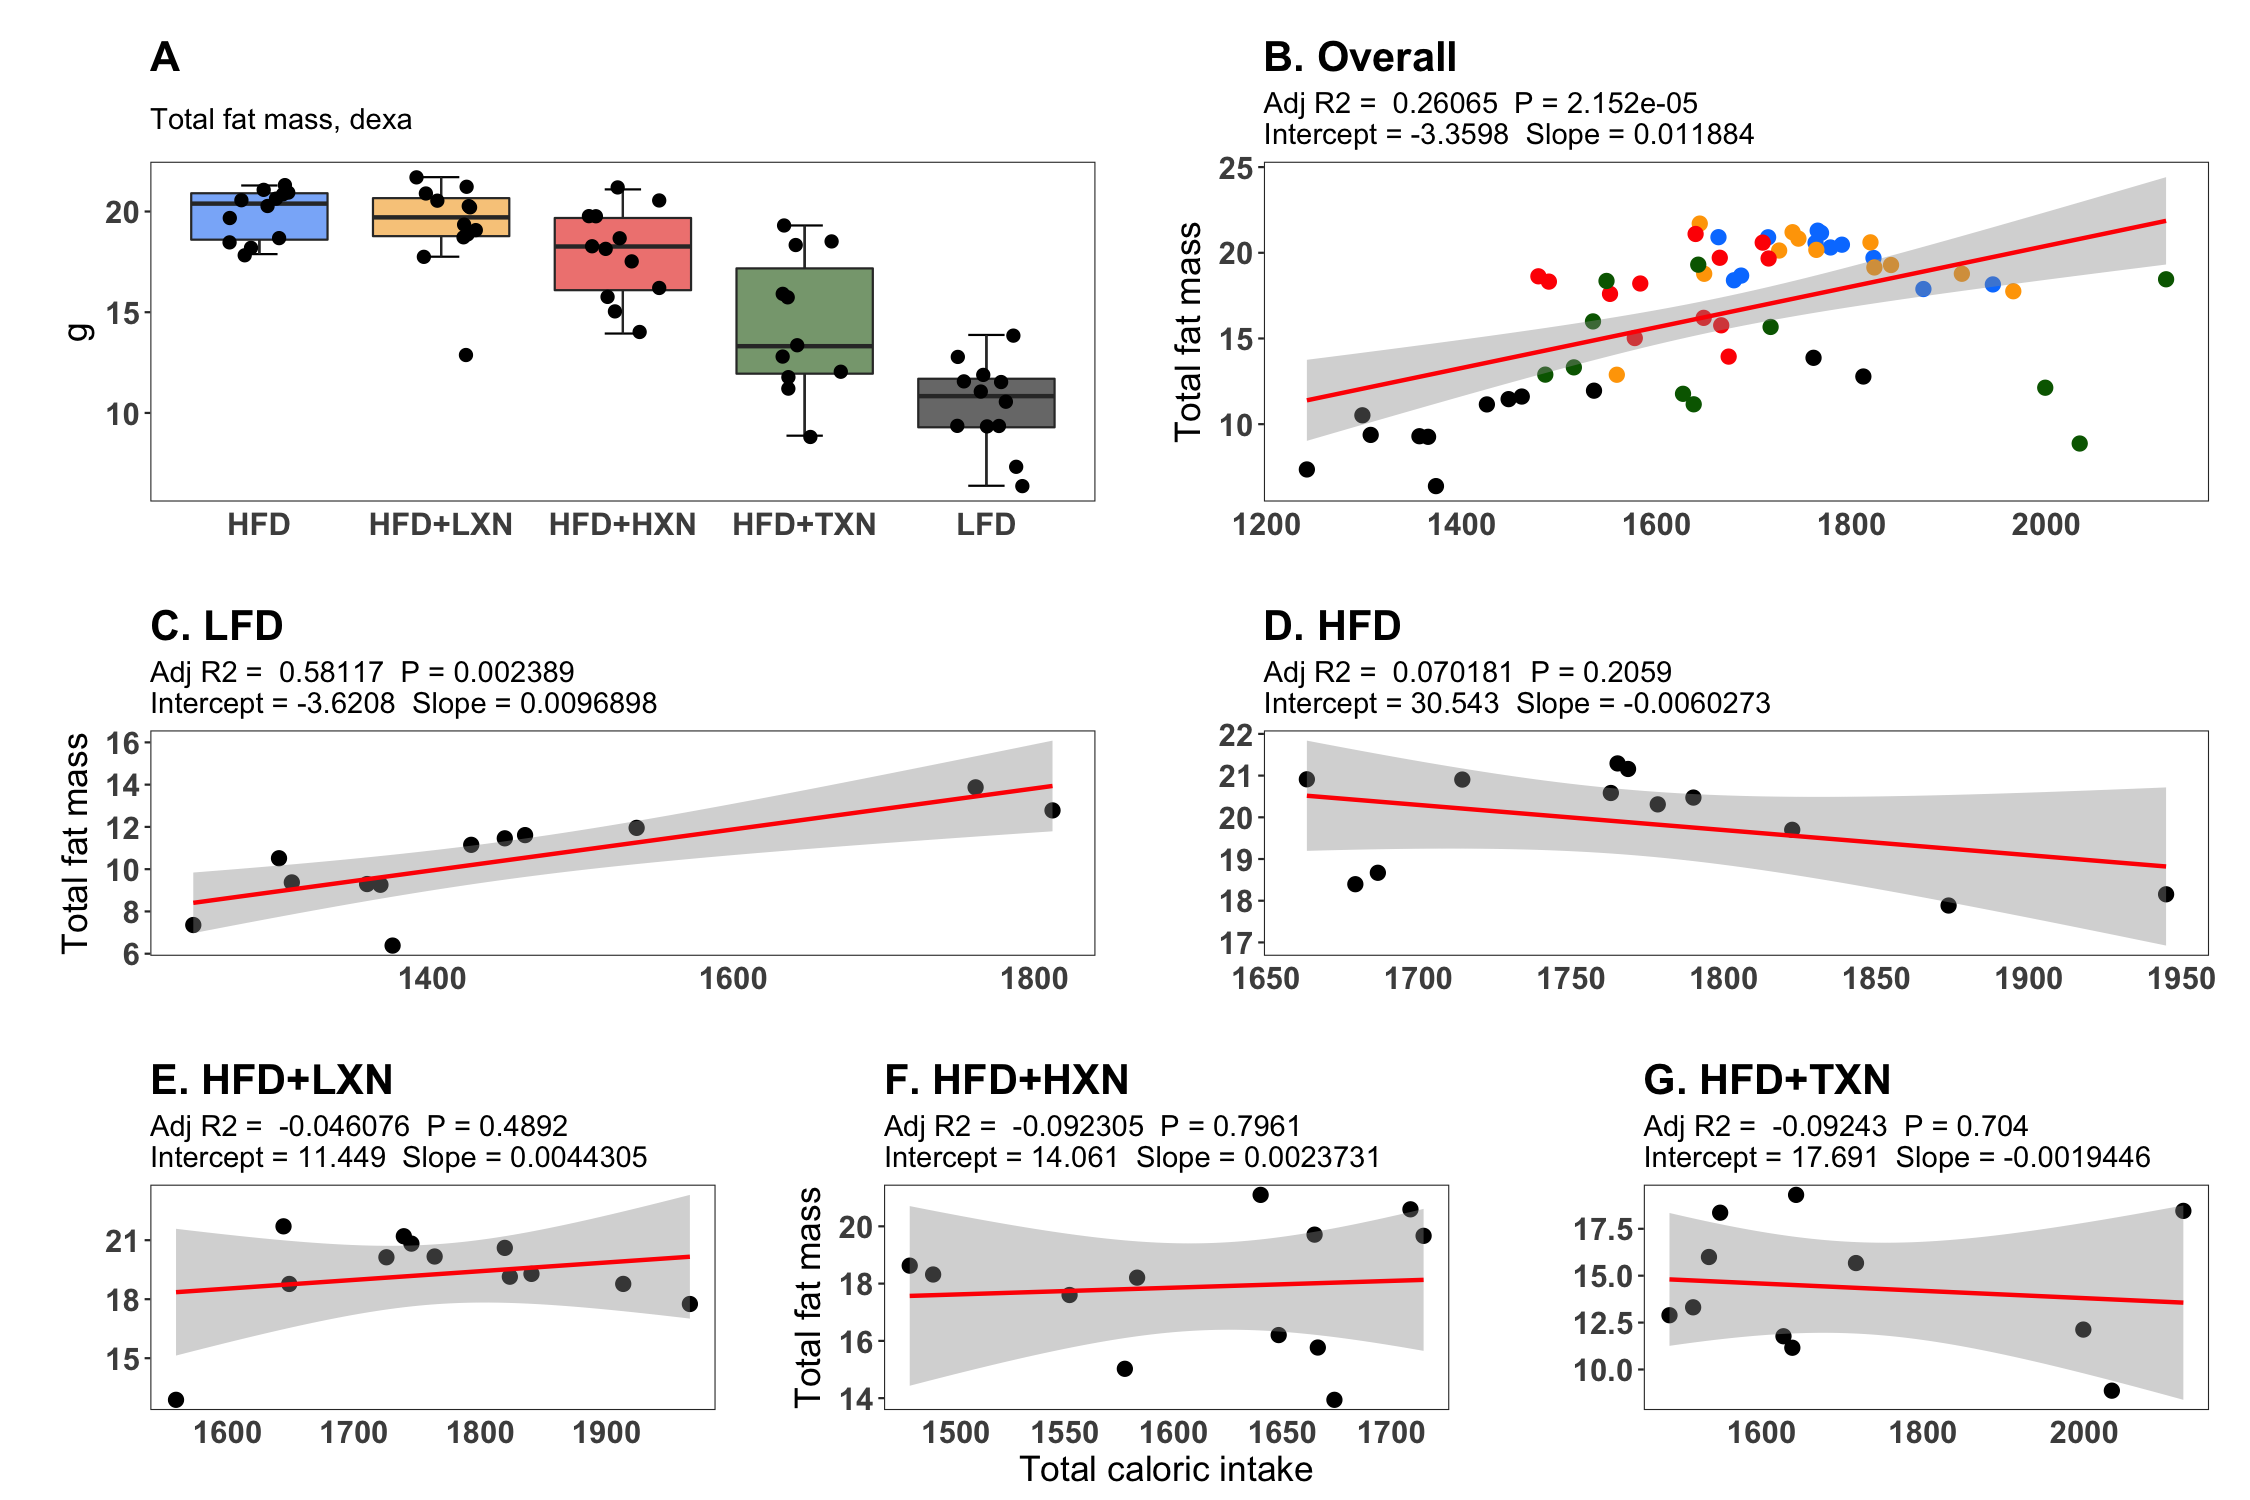

In [370]:
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 150)
(fig4_parA <- ((fig1 | fig2) / fig3) + plot_layout(heights = c(1, 2)))
graph2svg(fig4_parA, file = "fat_mass.svg", width = 14, height = 10)

#### Fig4. Total fat mass and caloric intake.

# Figure 5 - Epididymal fat mass and caloric intake

In [394]:
fig1 <- ggplot(data = data, aes(x = vars, y = epi_wat, fill = vars)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 4, width = 0.2, height = 0.1) +
	labs(x = '', y = 'g', subtitle = "Epididymal fat mass") +
	#xlab(" ") + ylab("mg") +
	ggtitle("A") +
	theme_bw() +
	theme_legend_free()

In [395]:
fig2 <- ggplotRegression(lm(epi_wat ~ Cal_cum, data = data), data$vars)+ ggtitle("B") + 
labs(x = ' ', y = 'Epididymal fat mass', title = "B. Overall") + theme_legend_free()

In [396]:
lfd_epi_wat <- ggplotRegression2(lm(epi_wat ~ Cal_cum, data = lfd)) + labs(x = ' ', y = 'Epididymal fat mass', title = "C. LFD") + theme_legend_free()
hfd_epi_wat <- ggplotRegression2(lm(epi_wat ~ Cal_cum, data = hfd)) + labs(x = ' ', y = '', title = "D. HFD") + theme_legend_free()
lxn_epi_wat <- ggplotRegression2(lm(epi_wat ~ Cal_cum, data = lxn)) + labs(x = ' ', y = '', title = "E. HFD+LXN") + theme_legend_free()
hxn_epi_wat <- ggplotRegression2(lm(epi_wat ~ Cal_cum, data = hxn)) + labs(x = 'Total caloric intake', y = 'Epididymal fat mass', title = "F. HFD+HXN") + theme_legend_free()
txn_epi_wat <- ggplotRegression2(lm(epi_wat ~ Cal_cum, data = txn)) + labs(x = ' ', y = '', title = "G. HFD+TXN") + theme_legend_free() 


fig3 <- (lfd_epi_wat | hfd_epi_wat) / (lxn_epi_wat |hxn_epi_wat | txn_epi_wat) + 
        plot_layout(guides="collect") +
        plot_annotation(title = 'epi_wat vs. Calories', 
        theme = theme(title = element_text(size = 20, face = 2)))

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



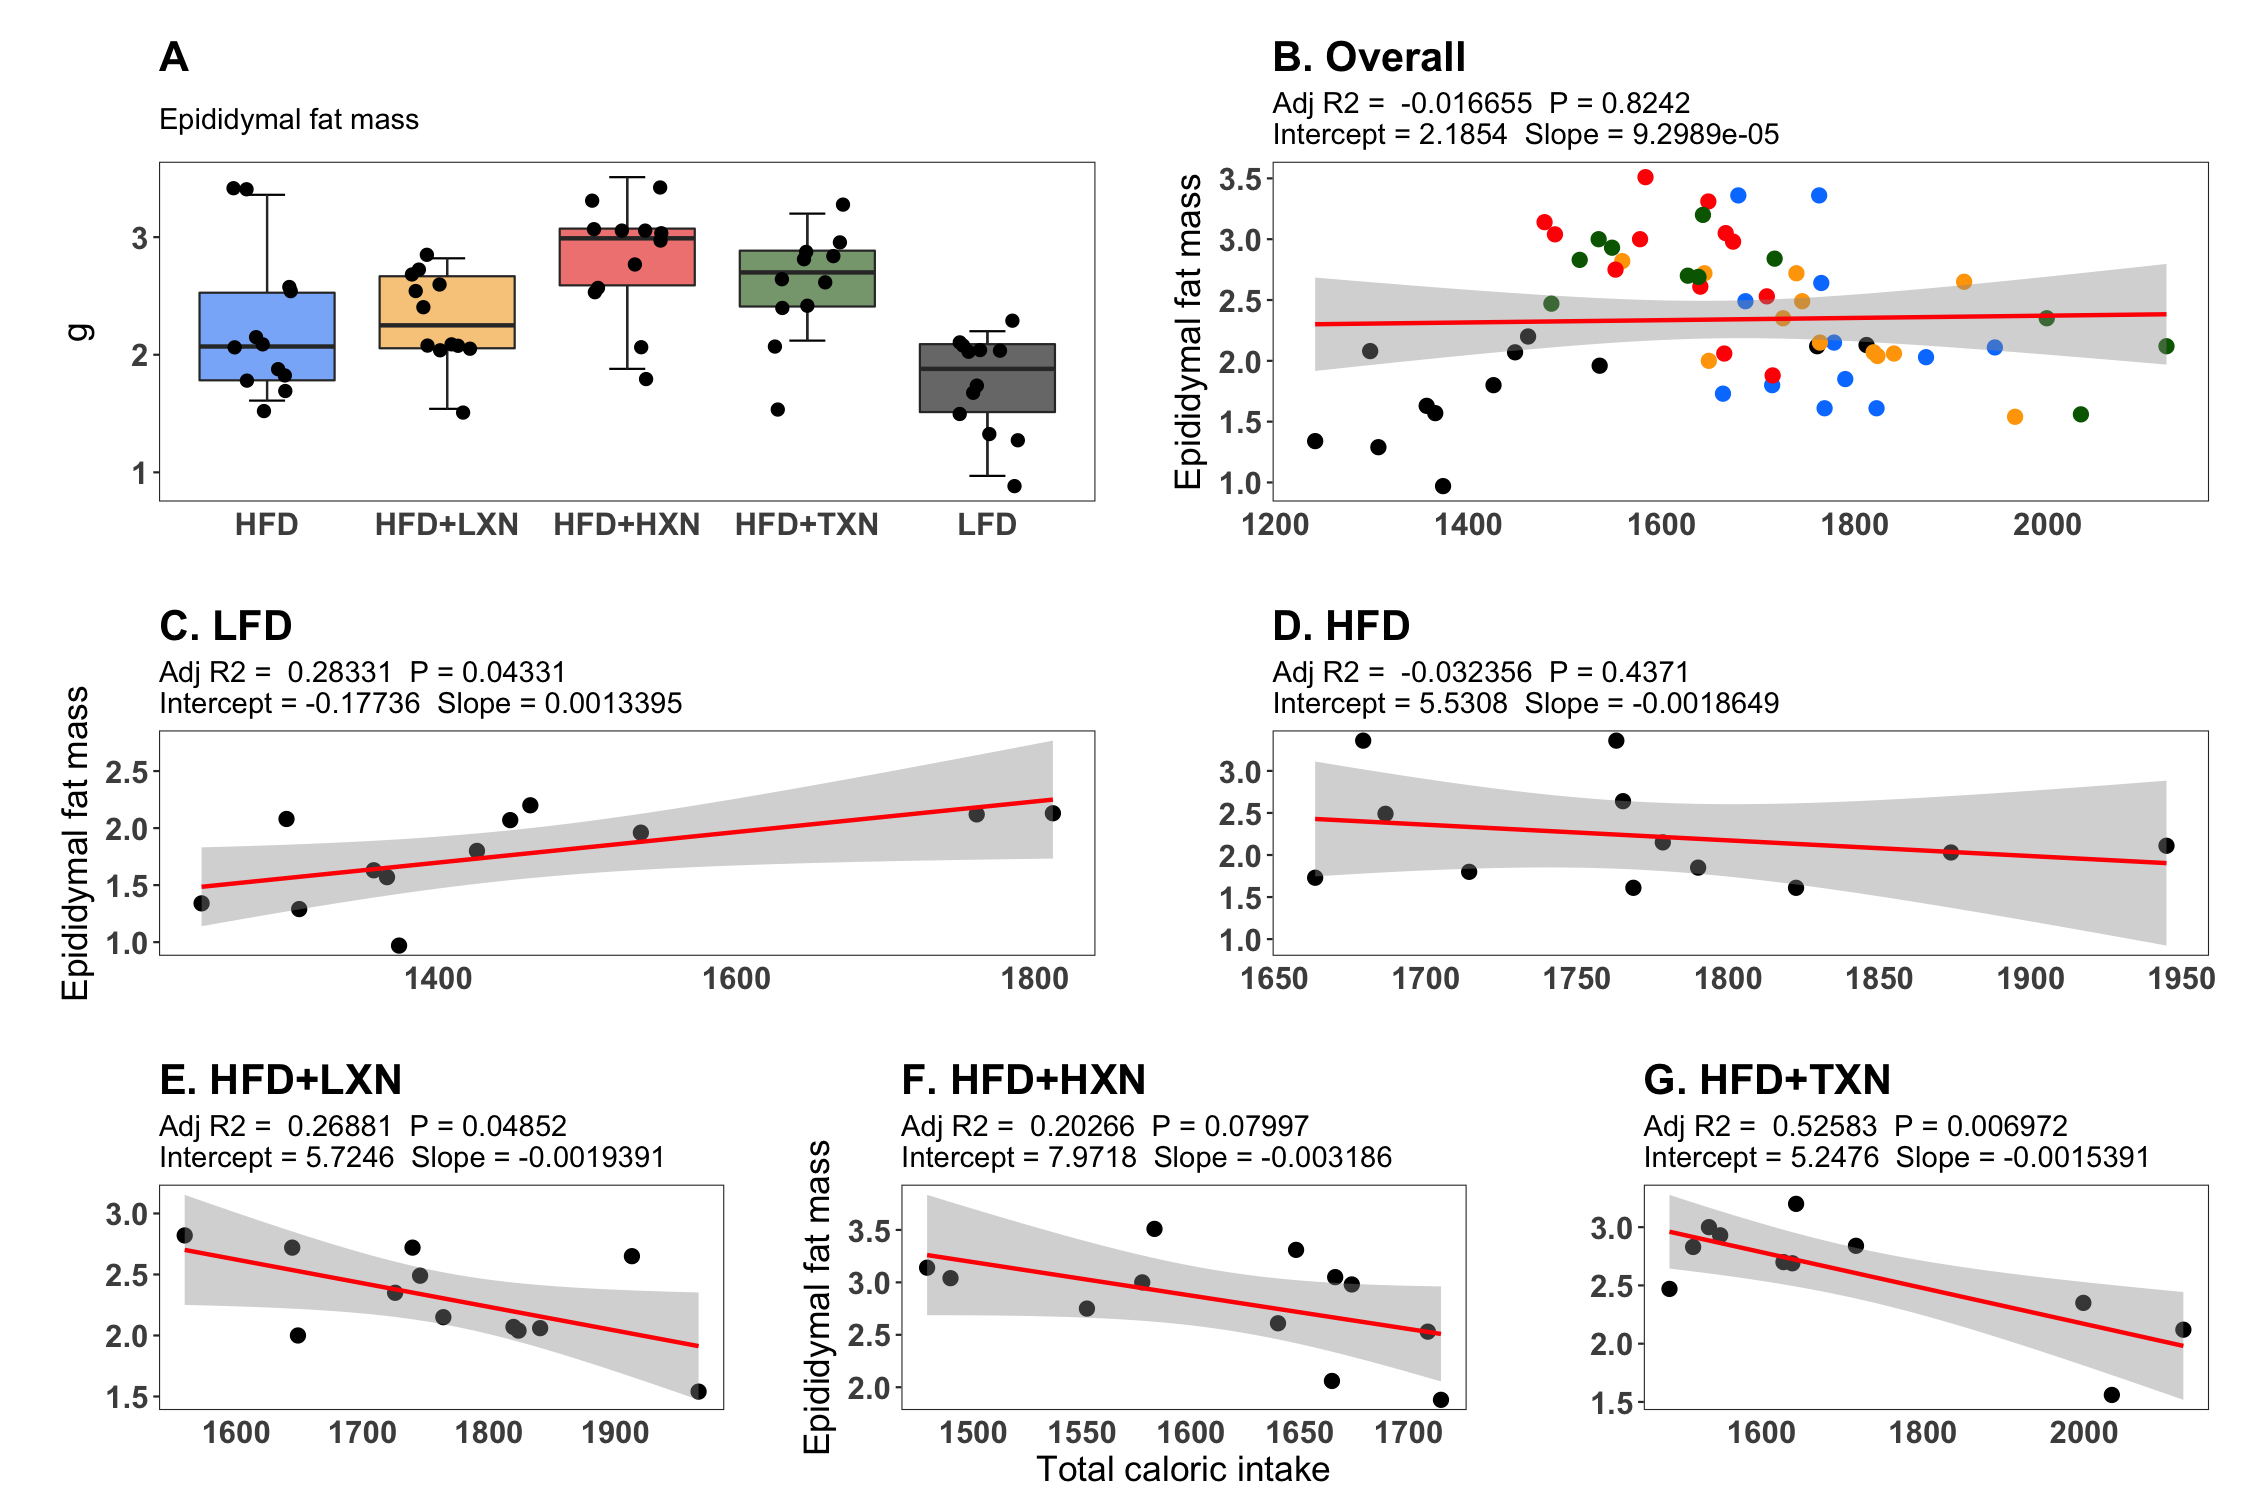

In [397]:
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 150)
(fig4_parB <- ((fig1 | fig2) / fig3) + plot_layout(heights = c(1, 2)))

#### Fig5. Epididymal fat mass and caloric intake.

# Figure 6 - Epididymal fat mass and total liver TAG

In [376]:
fig1 <- ggplot(data = data, aes(x = vars, y = epi_wat, fill = vars)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 4, width = 0.2, height = 0.1) +
	labs(x = '', y = 'g', subtitle = "Epididymal fat mass") +
	#xlab(" ") + ylab("mg") +
	ggtitle("A") +
	theme_bw() +
	theme_legend_free()

In [382]:
fig2 <- ggplotRegression(lm(lv_tot_tag ~ epi_wat, data = data), data$vars) + 
labs(x = ' ', y = 'Total liver triglyceride', title = "B. Overall") + theme_legend_free()

In [383]:
lfd_epi_tag <- ggplotRegression2(lm(lv_tot_tag ~ epi_wat, data = lfd)) + labs(x = ' ', y = 'Total liver triglyceride', title = "C. LFD") + theme_legend_free()
hfd_epi_tag <- ggplotRegression2(lm(lv_tot_tag ~ epi_wat, data = hfd))+ labs(x = ' ', y = '', title = "D. HFD") + theme_legend_free()
lxn_epi_tag <- ggplotRegression2(lm(lv_tot_tag ~ epi_wat, data = lxn))+ labs(x = ' ', y = '', title = "E. HFD+LXN") + theme_legend_free()
hxn_epi_tag <- ggplotRegression2(lm(lv_tot_tag ~ epi_wat, data = hxn))+ labs(x = 'Total caloric intake', y = 'Epididymal fat mass', title = "F. HFD+HXN") + theme_legend_free()
txn_epi_tag <- ggplotRegression2(lm(lv_tot_tag ~ epi_wat, data = txn))+ labs(x = ' ', y = '', title = "G. HFD+TXN") + theme_legend_free()


fig3 <- (lfd_epi_tag | hfd_epi_tag) / (lxn_epi_tag | hxn_epi_tag | txn_epi_tag) + 
        plot_layout(guides="collect") +
        plot_annotation(title = 'lv_tot_tag vs. epi-wat', 
        theme = theme(title = element_text(size = 20, face = 2)))

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



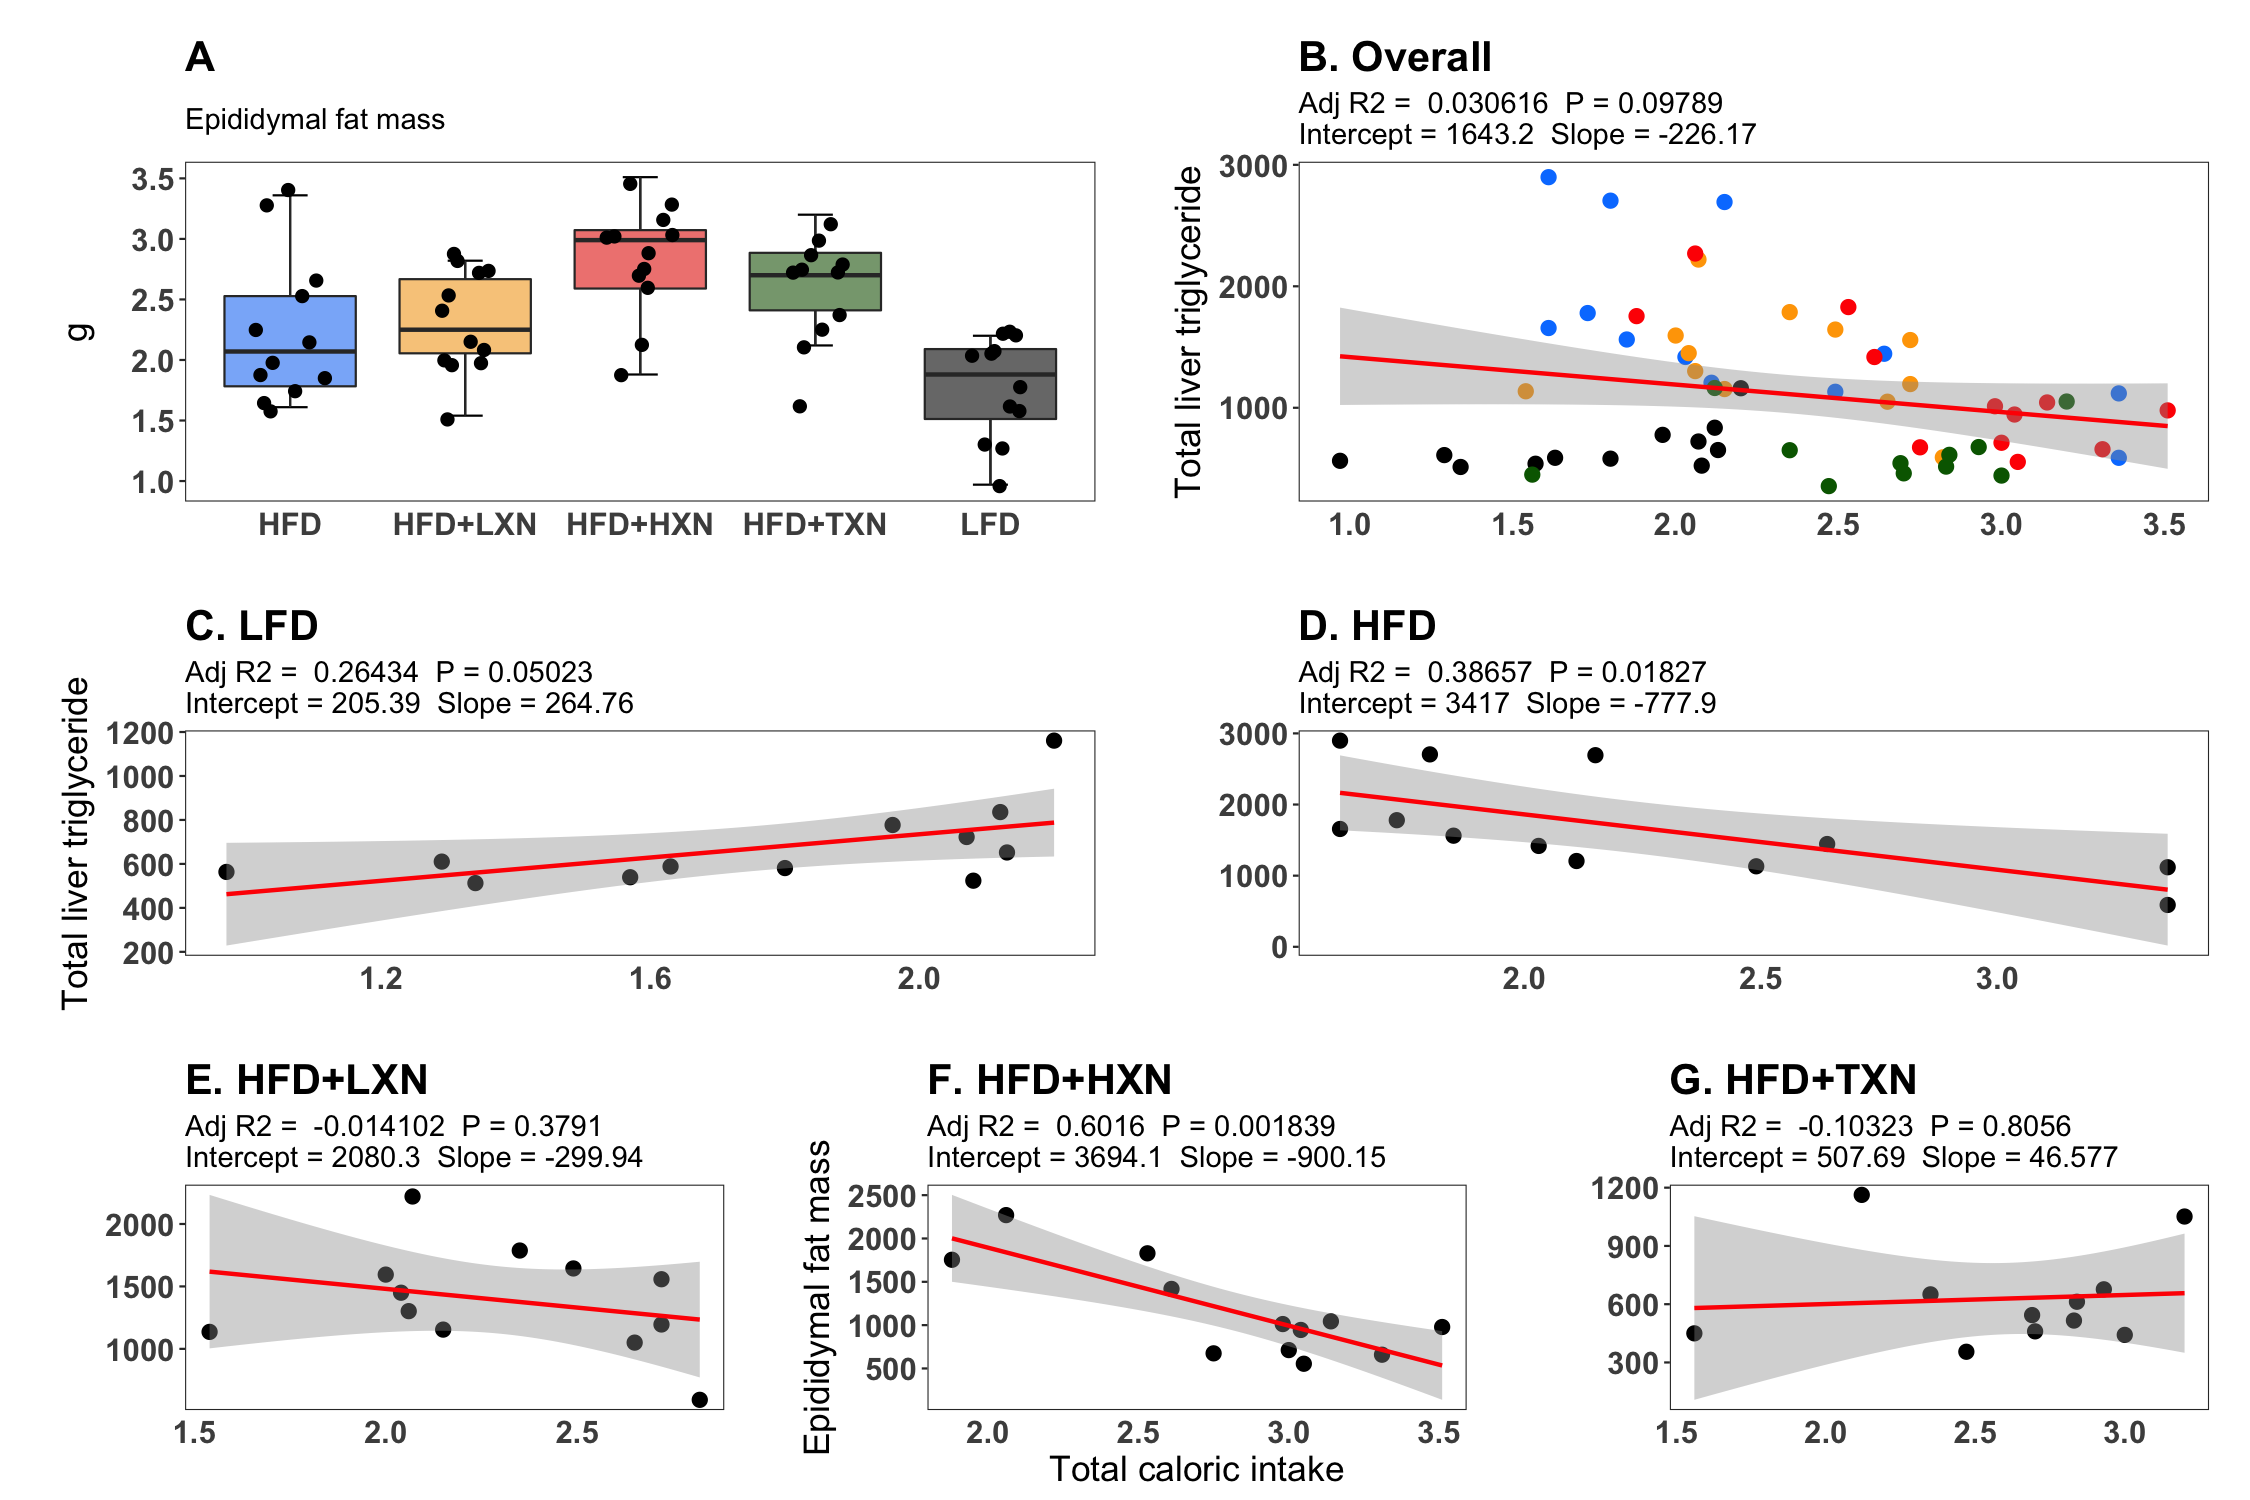

In [384]:
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 150)
(fig5 <- ((fig1 | fig2) / fig3) + plot_layout(heights = c(1, 2)))

# Figure 7 - rest fat mass

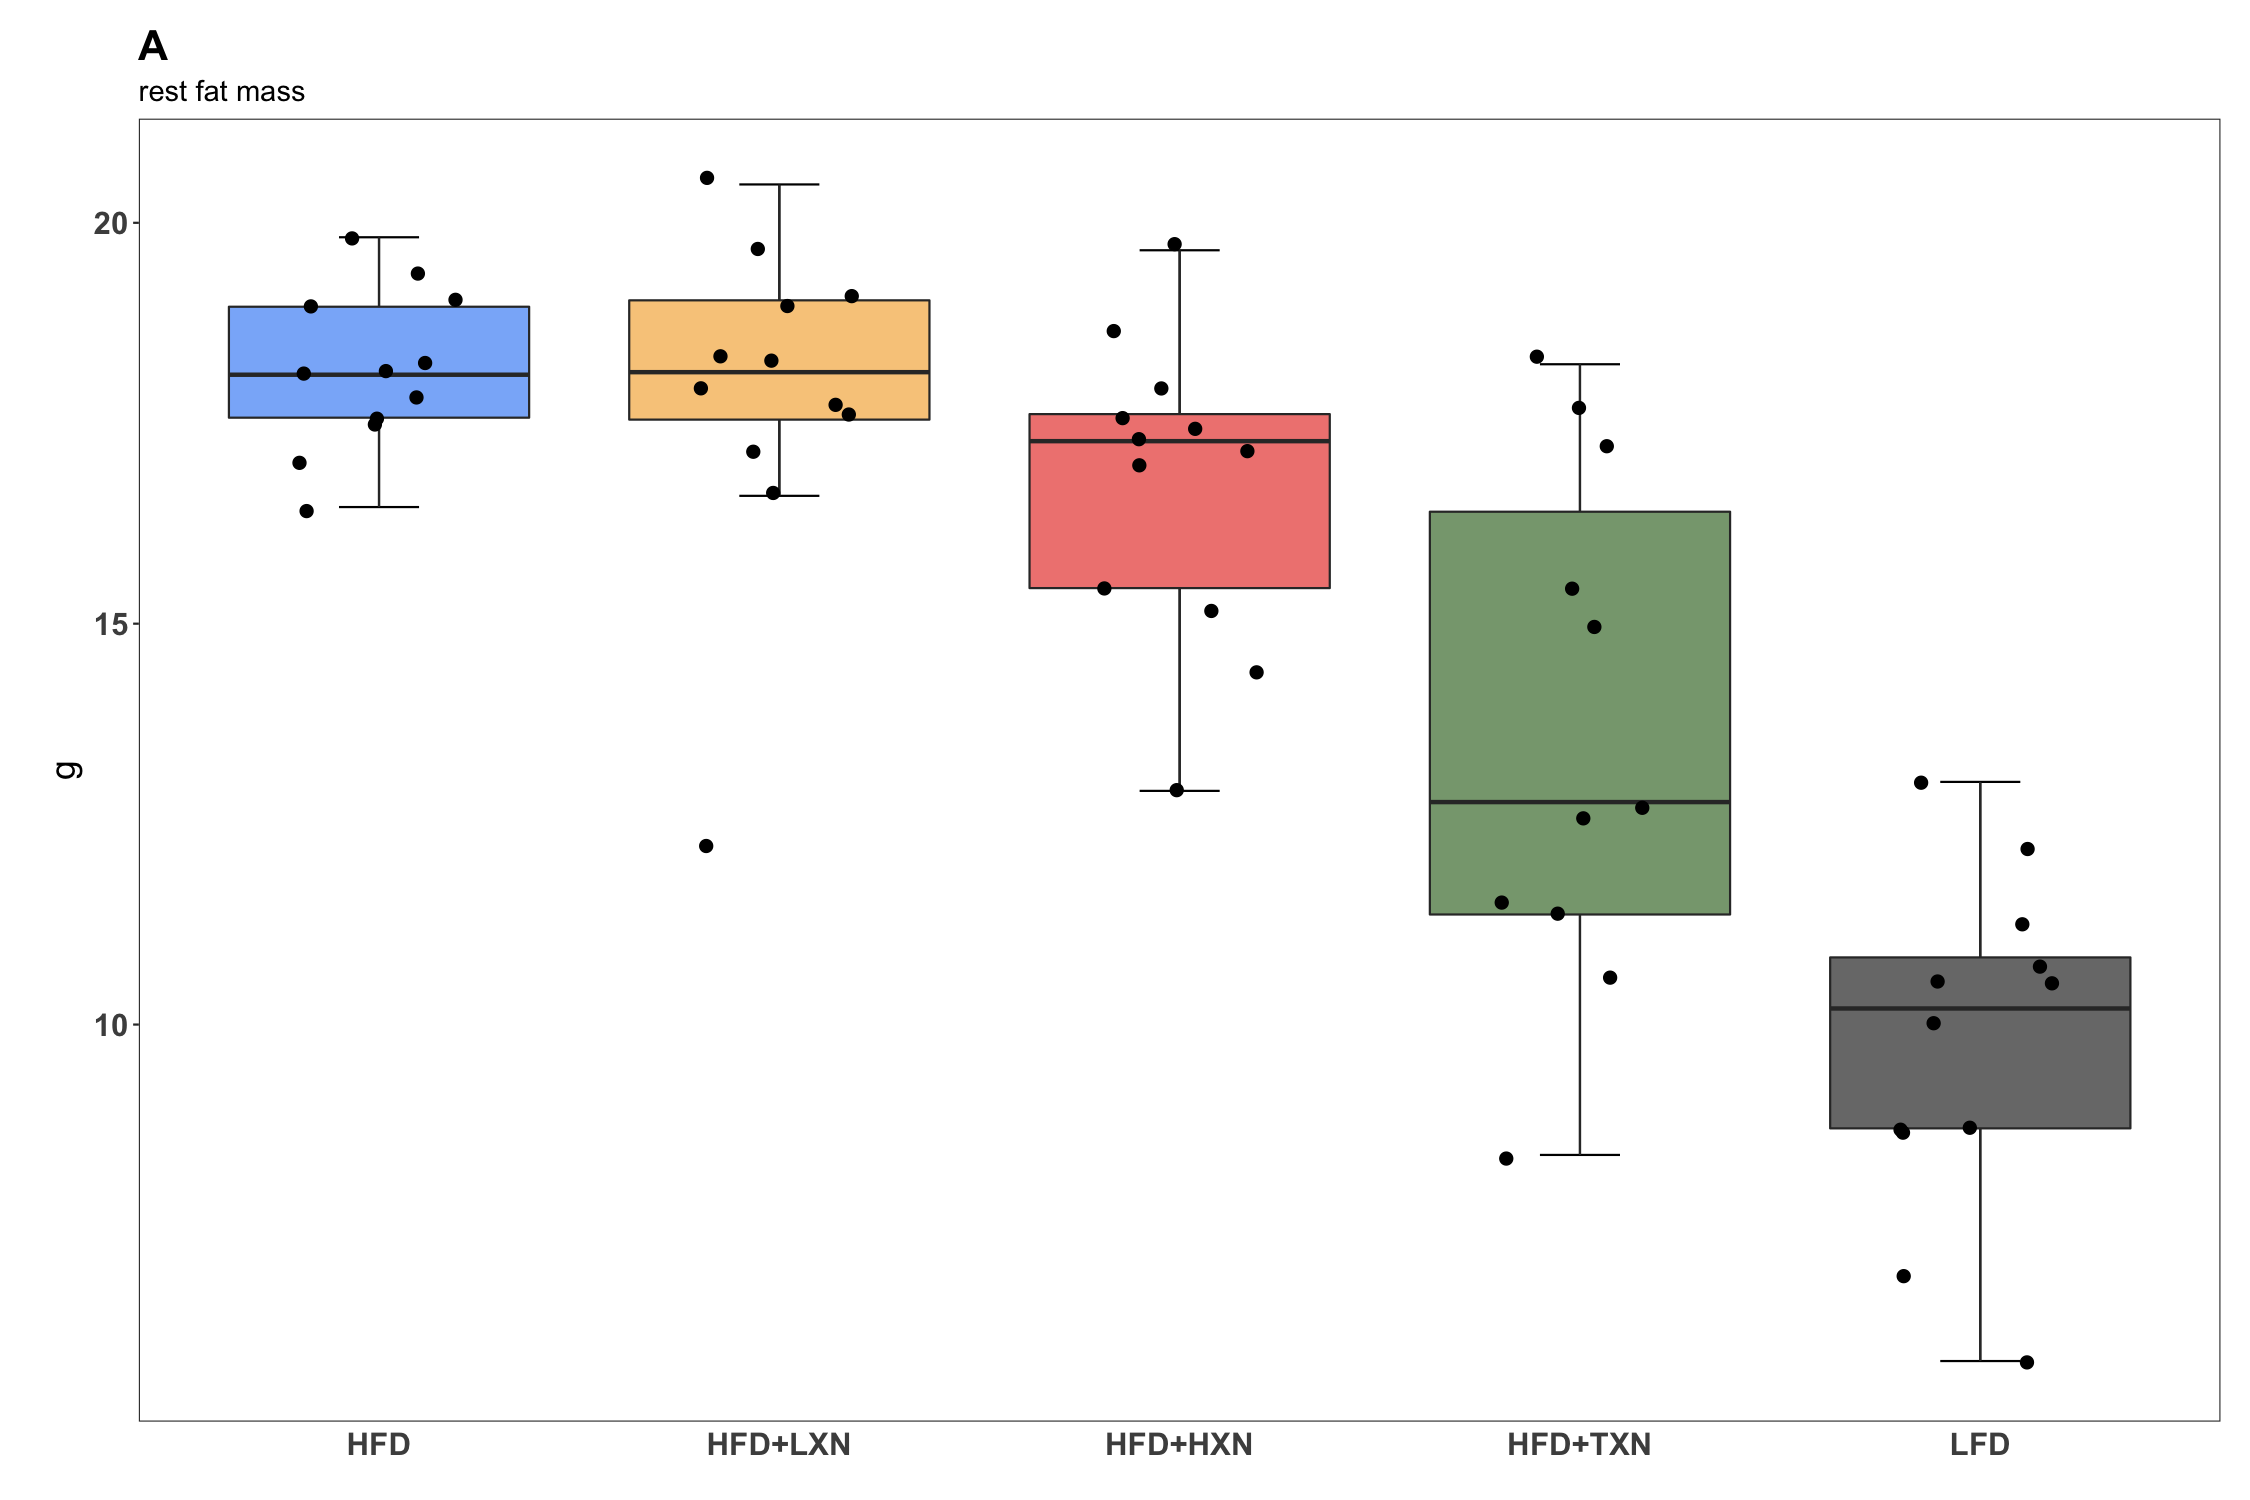

In [393]:
ggplot(data = data, aes(x = vars, y = rest_fat, fill = vars)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 4, width = 0.2, height = 0.1) +
	labs(x = '', y = 'g', subtitle = "rest fat mass") +
	#xlab(" ") + ylab("mg") +
	ggtitle("A") +
	theme_bw() +
	theme_legend_free()